In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('job-data.csv')

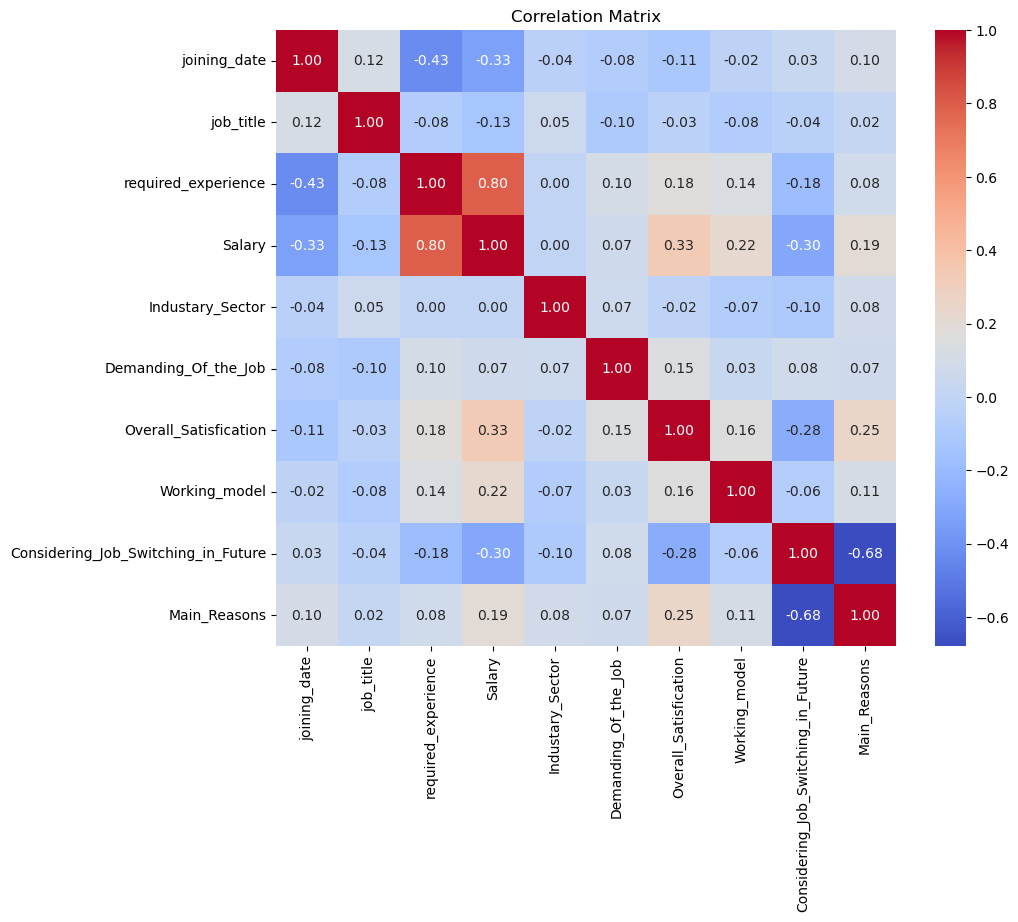

In [30]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_columns = ['job_title', 'required_experience', 'Industary_Sector', 
                       'Demanding_Of_the_Job', 'Overall_Satisfication', 'Working_model', 
                       'Considering_Job_Switching_in_Future', 'Main_Reasons']

# Convert 'joining_date' column to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<h4 style="color:green">1. Apply the multivariable regression method in your collected data and make decision
according to your target function considering the 2 or more important and relevant features
according to the correlation analysis. </h4>

My target function is Salary, so I selected three features that have a higher correlation with Salary to inform my decision. These features include 'job_title', 'required_experience', and 'Overall_Satisfaction'. By focusing on these key attributes, I aim to improve the accuracy of my salary predictions.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
df = pd.read_csv('job-data-LinerR.csv')

In [33]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=["required_experience", "Overall_Satisfication", "Working_model"])

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=["joining_date", "Salary"])
y = df_encoded["Salary"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the multivariable regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("R-squared or accuracy", r2)

R-squared or accuracy 0.5387180182620748


<h3 style="color:red">2. Apply multivariable logistic regression in your collected data and make decision according
to your target function considering the 2 or more important and relevant features according
to the correlation analysis</h3>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Load the data
df = pd.read_csv('job-data-LinerR.csv')

# Define salary ranges for each category
salary_ranges = [(0, 30000), (30001, 50000), (50001, 70000), (70001, 90000), (90001, float('inf'))]
categories = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

# Create a new categorical column based on the salary ranges
def categorize_salary(salary):
    for i, (lower, upper) in enumerate(salary_ranges):
        if lower <= salary <= upper:
            return categories[i]

df['Salary_Category'] = df['Salary'].apply(categorize_salary)

df.tail(3)

,joining_date,required_experience,Overall_Satisfication,Working_model,Salary,Salary_Category
246,02/01/2022,More than 3 years,Satisfied,On Site,26000,Low
247,01/02/2023,Less than 2 years,Satisfied,Remote,75000,Medium-High
248,01/02/2022,More than 5 years,Satisfied,Remote,110000,High


In [36]:
# Separate features (X) and target variable (y)
X = df.drop(columns=["joining_date", "Salary", "Salary_Category"])
# X = df.drop(columns=["joining_date", "Salary_Category"])
y = df['Salary_Category']

# Perform one-hot encoding for categorical variables
categorical_cols = ["required_experience", "Overall_Satisfication", "Working_model"]
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.50      0.55        12
         Low       1.00      0.62      0.76        13
      Medium       0.00      0.00      0.00         8
 Medium-High       0.17      0.25      0.20         4
  Medium-Low       0.43      0.77      0.56        13

    accuracy                           0.50        50
   macro avg       0.44      0.43      0.41        50
weighted avg       0.53      0.50      0.49        50



In [38]:
# from sklearn.tree import DecisionTreeClassifier

# # Build and train the decision tree model
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.50      0.63        12
         Low       0.91      0.77      0.83        13
      Medium       0.00      0.00      0.00         8
 Medium-High       0.22      0.50      0.31         4
  Medium-Low       0.43      0.77      0.56        13

    accuracy                           0.56        50
   macro avg       0.48      0.51      0.47        50
weighted avg       0.57      0.56      0.54        50



/Users/mdalamin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdalamin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdalamin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder
# from sklearn.tree import DecisionTreeClassifier

# # Load the data into df1
# df1 = pd.read_csv('job-data-LinerR.csv')

# # Define salary ranges for each category
# salary_ranges = [(0, 30000), (30001, 50000), (50001, 70000), (70001, 90000), (90001, float('inf'))]
# categories = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

# # Create a new categorical column based on the salary ranges
# def categorize_salary(salary):
#     for i, (lower, upper) in enumerate(salary_ranges):
#         if lower <= salary <= upper:
#             return categories[i]

# df1['Salary_Category'] = df1['Salary'].apply(categorize_salary)

# # Separate features (X) and target variable (y)
# X = df1.drop(columns=["joining_date", "Salary", "Salary_Category"])
# y = df1['Salary_Category']

# # Apply label encoding to categorical variables
# label_encoder = LabelEncoder()
# X_encoded = X.apply(label_encoder.fit_transform)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Build and train the decision tree model
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.50      0.63        12
         Low       0.91      0.77      0.83        13
      Medium       0.00      0.00      0.00         8
 Medium-High       0.22      0.50      0.31         4
  Medium-Low       0.43      0.77      0.56        13

    accuracy                           0.56        50
   macro avg       0.48      0.51      0.47        50
weighted avg       0.57      0.56      0.54        50



/Users/mdalamin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdalamin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdalamin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3 style="color:blue">3. For applying KNN algorithm what will be our target function considering important
features as dependent and independent variabls.</h3>

In [26]:
# Load the data
df = pd.read_csv('job-data-knn.csv')

# Exclude "joining_date" column
df_exclude_date = df.drop(columns=["joining_date"])

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_exclude_date, columns=["job_title", "required_experience", "Overall_Satisfication", "Working_model", "Considering_Job_Switching_in_Future", "Main_Reasons"])

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=["Salary"])
y = df_encoded["Salary"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
# Build the KNN regression model
k = 3  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [27]:
# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model

r2 = r2_score(y_test, y_pred)


print("R-squared, accuracy", r2)

R-squared, accuracy 0.4395739371921722
